## Naive Bayes Classifier

**Naive Bayes classifier** is a simple probabilistic classifier based on applying **Bayes theorem** with independence assumptions between the features. This classifier **assumes the features are equally important and mutually independent (hence the name "Naive" Bayes).** A Naive Bayes model is easy to build, with no complicated iterative parameter estimation which makes it particularly useful for very large datasets. Despite its simplicity, the Naive Bayesian classifier often does surprisingly well and is widely used because it often outperforms more sophisticated classification methods.  	

<br>
**Bayes Theorem**

> Bayes theorem provides a way of calculating the posterior probability, $P(A \mid B)$, from $P(A)$, $P(B)$, and $P(B \mid A)$.

> $$P(A \mid B) = \frac {P(B \mid A) \cdot P(A)} {P(B)}$$
where,  
* $P(A|B)$ is the posterior probability of class (target) given predictors (features). 
* $P(B|A)$ is the likelihood which is the probability of predictor given class.
* $P(A)$ is the prior probability of class.
* $P(B)$ is the prior probability of predictor.

> In other words:
$$posterior = \frac {likelihood * prior} {evidence}$$

<br>
**How classification is done?**

> Naive Bayes classifier assume that the effect of the value of predictor (x) on a given class (y) is independent of the values of other predictors. This assumption is called class conditional independence.

> If predictor (feature) values $x_1, x_2, ..., x_n$ are given we can predict the class y which it belongs to by calculating $P(y_i \mid x_1, x_2, ..., x_n)$ for all $y_i \in Y$ (ie, for all classes) and selecting the maximum valued among them as it's class.


> $$P(y_i \mid x_1, x_2, ..., x_n) = \frac {P(x_1 \mid y_i) \cdot P(x_2 \mid y_i) ... P(x_n \mid y_i) \cdot P(y_i)} {P(x_1) \cdot P(x_2) ... P(x_n)}$$

> Note: If any predictor is numerical variable then it should be transformed to categorical counterparts (binning) before constructing their frequency tables. The other option we have is using the distribution of the numerical variable to have a good guess of the frequency. For example, one common practice is to assume normal distributions for numerical variables.

<br>
**Types of Naive Bayes classifier**

>1. Multinomial Naive Bayes:  
This is mostly used for document classification problem. The features/predictors used by the classifier are the frequency of the words present in the document.

>2. Bernoulli Naive Bayes:  
This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.

>3. Gaussian Naive Bayes:  
When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution (Normal Distribution). Here the conditional probability on predictors are given by:
$$P(x_i \mid y) = \frac {1} {\sqrt{2 \pi \sigma_y^2}} \exp (- \frac {(x_i - \mu_y)^2}{2 \sigma_y^2})$$

<br>
**Applications**

> * Text classification/ Spam Filtering/ Sentiment Analysis.
* Real time predictions.
* Facial recognition.
* Recommendation system.

<br>
**Advantages**

> * It is easy and fast to predict the class. It also performs well in multi-class prediction.
* It works well even with less training data.
* When assumption of independence holds, a Naive Bayes classifier performs better compare to other models.
* It perform well in case of categorical input variables compared to numerical variables. For numerical variable, normal distribution is assumed (which is a strong assumption).


<br>
**Disadvantages**

> * If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as Zero Frequency. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.
* Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

## Use case implementation of Naive Bayes Classifier:¶

We will build a model to implement text classification of news headlines and classify it into different topics.

Let's get started...

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the data
data = pd.read_csv('20newsgroups.csv')

print(data.shape)

(11314, 2)


In [3]:
data.head()

,text,class
0,From: lerxst@wam.umd.edu (where's my thing)\r\...,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,sci.space


In [4]:
# encode the class to integer values
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('20newsgroups.csv')

encoder = LabelEncoder()
data['class'] = encoder.fit_transform(data['class'])

# form a dictionary for index to class mapping
encoded_mapping = dict(zip(list(range(20)), encoder.classes_))

In [5]:
data.head()

,text,class
0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [6]:
# dictionary for index to class mapping
encoded_mapping

{0: 'alt.atheism',
 1: 'comp.graphics',
 2: 'comp.os.ms-windows.misc',
 3: 'comp.sys.ibm.pc.hardware',
 4: 'comp.sys.mac.hardware',
 5: 'comp.windows.x',
 6: 'misc.forsale',
 7: 'rec.autos',
 8: 'rec.motorcycles',
 9: 'rec.sport.baseball',
 10: 'rec.sport.hockey',
 11: 'sci.crypt',
 12: 'sci.electronics',
 13: 'sci.med',
 14: 'sci.space',
 15: 'soc.religion.christian',
 16: 'talk.politics.guns',
 17: 'talk.politics.mideast',
 18: 'talk.politics.misc',
 19: 'talk.religion.misc'}

In [7]:
# split train and test data
from sklearn.model_selection import train_test_split

x = data.iloc[:, 0]
y = data.iloc[:, 1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=46)

print('x_train shape:{}'.format(x_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('x_test shape:{}'.format(x_test.shape))
print('y_test shape:{}'.format(y_test.shape))

x_train shape:(9051,)
y_train shape:(9051,)
x_test shape:(2263,)
y_test shape:(2263,)


In [8]:
# create model and fit on training data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

Accuracy: 0.8440123729562528
             precision    recall  f1-score   support

          0       0.91      0.75      0.83       110
          1       0.93      0.73      0.82       118
          2       0.91      0.77      0.83       129
          3       0.60      0.92      0.73        97
          4       0.92      0.75      0.83       105
          5       0.95      0.89      0.92       117
          6       0.96      0.67      0.79       128
          7       0.84      0.93      0.88       110
          8       0.98      0.91      0.95       135
          9       0.95      0.93      0.94       128
         10       0.96      0.99      0.97       133
         11       0.73      1.00      0.84       117
         12       0.90      0.79      0.84       110
         13       0.90      0.92      0.91       102
         14       0.92      0.92      0.92       128
         15       0.50      0.98      0.66       117
         16       0.80      0.95      0.87       101
         17     

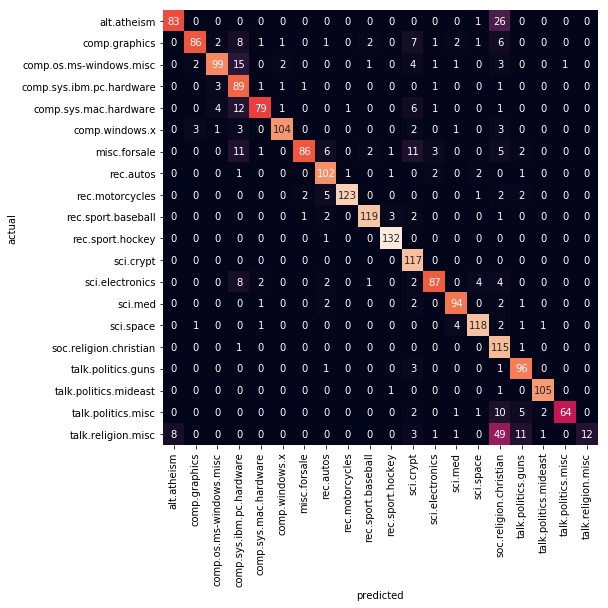

In [9]:
# evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions = model.predict(x_test)

print('Accuracy: {}'.format(accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))

plt.figure(figsize=(8, 8))
conf_matrix = pd.DataFrame(confusion_matrix(y_test, predictions),
                           index=list(encoded_mapping.values()),
                           columns=list(encoded_mapping.values()))
print('Confusion Matrix:\n')
sns.heatmap(conf_matrix, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [10]:
# define a function to manually check for some text classification
def classify(text):
    prediction = model.predict([text])
    return encoded_mapping[prediction[0]]

In [11]:
classify('I have trouble with names and faces, but I never forget a car.')

'rec.autos'

In [12]:
classify('The Politics of the Middle East is complicated, multifaceted and different from other regions due to the oil resources in the region')

'talk.politics.mideast'

In [13]:
classify('Medicine is the science and practice of establishing the diagnosis, prognosis, treatment, and prevention of disease.')

'sci.med'